**Importing dependecies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

**----- DATA ANALYSIS & PRE PROCESSING-----**

**Loading the dataset and initial data analysis**

In [ ]:
dataset = pd.read_csv("titanicsurvival_dataset.csv") #reading the dataset

In [ ]:
dataset.head(10) #gives 1st 10 rows

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.000000,7.2500,0
1,1,0,38.000000,71.2833,1
2,3,0,26.000000,7.9250,1
3,1,0,35.000000,53.1000,1
4,3,1,35.000000,8.0500,0
5,3,1,29.699118,8.4583,0
6,1,1,54.000000,51.8625,0
7,3,1,2.000000,21.0750,0
8,3,0,27.000000,11.1333,1
9,2,0,14.000000,30.0708,1


In [ ]:
dataset.shape #gives dimensions of the dataset

(891, 5)

In [ ]:
dataset.info() #info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [ ]:
dataset.describe() #statistical info about the dataset

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [ ]:
dataset.isnull().sum() #Checking any null values

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

**FILLING NULL VALUES**

**Checking Age feature distribution to determine mean/mode/median**

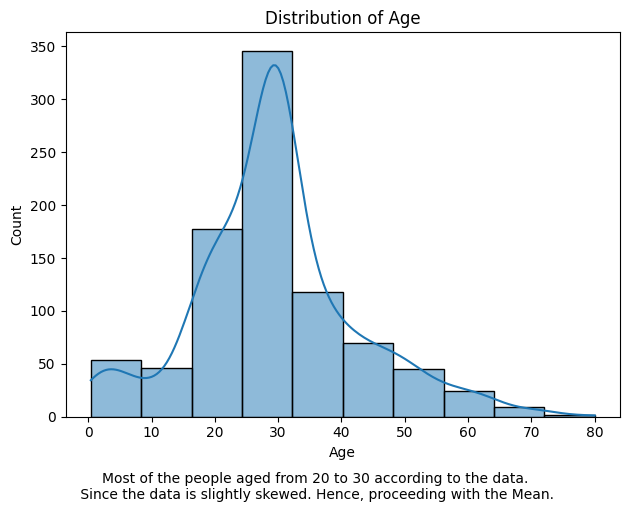

In [93]:
sns.histplot(dataset["Age"], bins=10, kde=True) #histplot
plt.title("Distribution of Age") #title of the plot
plt.xlabel("Age") #xlabel
plt.ylabel("Count") #ylabel
plt.figtext(0.5, -0.05, s="Most of the people aged from 20 to 30 according to the data.\n Since the data is slightly skewed. Hence, proceeding with the Mean.", ha="center", fontsize=10)
plt.tight_layout()
plt.show()



In [ ]:
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True) #filling the NaN cells with Mean.

C:\Users\perug\AppData\Local\Temp\ipykernel_20868\824851362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)


**Analysis of the above operation**

In [29]:
dataset["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [30]:
dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

**LABEL ENCODING**

In [31]:
dataset["Sex"].head(10)

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object

In [ ]:
dataset["Sex"] = dataset["Sex"].apply(lambda x: 1 if x == "male" else 0) #filled with 1 for men, 0 for women

In [33]:
dataset["Sex"].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int64

In [37]:
dataset.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.000000,7.2500,0
1,1,0,38.000000,71.2833,1
2,3,0,26.000000,7.9250,1
3,1,0,35.000000,53.1000,1
4,3,1,35.000000,8.0500,0
5,3,1,29.699118,8.4583,0
6,1,1,54.000000,51.8625,0
7,3,1,2.000000,21.0750,0
8,3,0,27.000000,11.1333,1
9,2,0,14.000000,30.0708,1


**Separating the training features and the target feature**

In [ ]:
X = dataset.iloc[:, :-1] #Separating the 1st 4 features
Y = dataset["Survived"] #Separating the target feature(5th feature)

**Analysis of the above separation**

In [39]:
print(X)

     Pclass  Sex        Age     Fare
0         3    1  22.000000   7.2500
1         1    0  38.000000  71.2833
2         3    0  26.000000   7.9250
3         1    0  35.000000  53.1000
4         3    1  35.000000   8.0500
..      ...  ...        ...      ...
886       2    1  27.000000  13.0000
887       1    0  19.000000  30.0000
888       3    0  29.699118  23.4500
889       1    1  26.000000  30.0000
890       3    1  32.000000   7.7500

[891 rows x 4 columns]


In [40]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [41]:
print(X.shape)
print(Y.shape)

(891, 4)
(891,)


**----- BUILDING A MODEL -----**

**Splitting the data for training and testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=43) #Splitting the data(80% for train, 20% for test)

In [ ]:
print(X_train.shape) #finding dimensions of the splitted data
print(X_test.shape)

(712, 4)
(179, 4)


In [ ]:
print(Y_train.shape) #finding dimensions of the splitted data
print(Y_test.shape)

(712,)
(179,)


**Scaling the data**

In [ ]:
SC = StandardScaler() #intialising standard scalar
X_train_transformed = SC.fit_transform(X_train) #transforming the data
X_test_transformed = SC.transform(X_test)

**Initializing the model and training it**

In [ ]:
model = GaussianNB()
model.fit(X_train_transformed, Y_train) #training

GaussianNB()

**Prediction for test data**

In [ ]:
y_pred = model.predict(X_test_transformed) #prediction
print(y_pred)

[0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]


**----- MODEL EVALUATION ----**

**Finding Accuracy on training and test data**

In [49]:
X_train_prediction = model.predict(X_train_transformed)
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Training Accuaracy: ", X_train_accuracy)

Training Accuaracy:  0.773876404494382


In [50]:
X_test_prediction = model.predict(X_test_transformed)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Test Accuracy: ", X_test_accuracy)

Test Accuracy:  0.8044692737430168


**Classification Report**

In [51]:
CR = classification_report(Y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**Confusion Matrix**

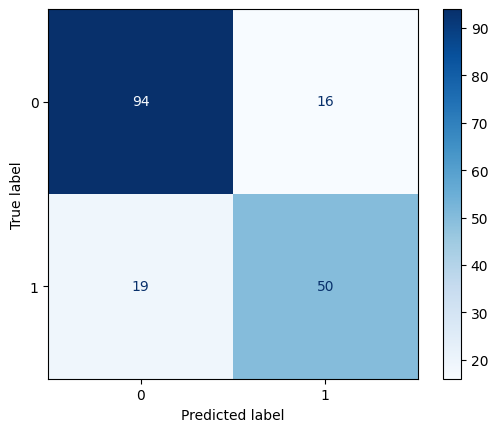

In [53]:
CM = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=[0,1])
disp.plot(cmap="Blues")
plt.show()

**Model Evaluation using manual inputs**

In [58]:
Pclass = int(input("Enter the Pclass: "))
Sex = int(input("Enter the sex: 0 for women, 1 for men: "))
Age = float(input("Enter the age: "))
Fare = float(input("Please enter Fare: "))

data = [[Pclass, Sex, Age, Fare]]

print("Data given: ", data)

transformed_data = SC.transform(data)
result = model.predict(transformed_data)

print(result)

if result == 1:
    print("Person may survive")
else:
    print("Person may not survive")

Data given:  [[2, 1, 23.0, 56.12]]
[0]
Person may not survive


c:\Users\perug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Deep check between test and predicted data (optional)**

In [70]:
for index, (i,j) in enumerate(zip(Y_test, y_pred)): #Only 100 datapoints
    if index == 100:
        break #break after 100 iterations
    print(f"{index}: {i} {j}")

0: 0 0
1: 1 0
2: 0 0
3: 0 0
4: 0 0
5: 1 1
6: 1 1
7: 0 0
8: 0 0
9: 0 0
10: 0 1
11: 0 0
12: 1 1
13: 1 0
14: 0 0
15: 0 0
16: 1 1
17: 0 0
18: 0 0
19: 1 0
20: 0 0
21: 0 0
22: 0 0
23: 0 0
24: 0 0
25: 0 0
26: 0 0
27: 1 1
28: 0 0
29: 0 1
30: 0 0
31: 0 0
32: 1 0
33: 0 1
34: 0 1
35: 0 0
36: 0 0
37: 1 0
38: 0 0
39: 0 0
40: 0 0
41: 0 0
42: 0 0
43: 1 1
44: 1 1
45: 0 1
46: 1 1
47: 1 1
48: 0 0
49: 0 0
50: 1 1
51: 1 0
52: 1 1
53: 1 1
54: 0 0
55: 1 0
56: 1 0
57: 0 0
58: 1 1
59: 1 1
60: 0 0
61: 1 1
62: 0 0
63: 0 1
64: 0 0
65: 0 0
66: 1 1
67: 0 0
68: 1 1
69: 1 1
70: 1 0
71: 1 1
72: 1 1
73: 1 1
74: 0 1
75: 0 0
76: 0 0
77: 1 1
78: 1 1
79: 0 0
80: 0 0
81: 0 0
82: 1 0
83: 1 1
84: 1 1
85: 1 1
86: 0 0
87: 0 0
88: 1 0
89: 0 1
90: 1 0
91: 1 1
92: 1 0
93: 0 0
94: 0 0
95: 1 1
96: 0 0
97: 0 0
98: 1 1
99: 1 1
